# Requirements

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, RepeatedKFold
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Laboratory Exercise - Run Mode (8 points)

## The Vacation Preferences Dataset
The dataset contains information about individuals and their vacation preferences. It includes details such as age, gender, income, and education level. It also provides insights into their vacation habits, like the number of vacations taken each year, preferred activities (such as hiking, swimming, skiing, or sunbathing), and their budget for vacations. Other information includes the type of place they live in (urban, suburban, or rural), how far they live from mountains and beaches, and their favorite season for vacations (summer, winter, spring, or fall). The dataset also contains information whether they have pets and if they are concerned about the environment. All these features serve as input variables for predictive modeling. The 'Preference' attribute serves as the target variable, where 1 represents preference for mountains, 0 for beaches.

Load the dataset into a `pandas` data frame.

In [2]:
# Write your code here. Add as many boxes as you need.
original = pd.read_csv('vacation_preferences_data.csv')
df = original.copy()

Preprocess the input and the output variables appropriately.

In [3]:
# Write your code here. Add as many boxes as you need.
original

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,female,85325,master,3,hiking,1762,suburban,51.0,262,fall,1,0,1
52440,37.0,female,110346,bachelor,7,swimming,1676,urban,259.0,84,spring,1,0,0
52441,53.0,non-binary,71080,doctorate,7,swimming,3877,urban,NaN,27,fall,0,1,0
52442,40.0,female,75174,doctorate,9,swimming,4620,suburban,173.0,10,summer,0,1,0


<Axes: xlabel='Preference'>

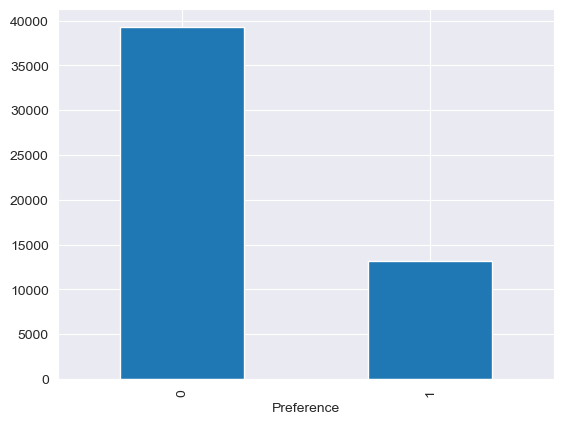

In [4]:
df['Preference'].value_counts().plot(kind='bar')

In [ ]:
# If there is nan values labeled with any char(?)
def setNull(data:pd.DataFrame, columns:list):
    data_copy = data.copy()
    for column in columns:
        data_copy[column] = data_copy[column].replace('?',np.nan)

In [5]:
def label_data(data:pd.DataFrame, columns:list):
  encoder = LabelEncoder()
  data_copy = data.copy()
  for column in columns:
    data_copy[column] = encoder.fit_transform(data_copy[[column]].astype(str).values.ravel())
    if 'nan' in encoder.classes_:
      data_copy[column] = data_copy[column].replace(data_copy[column].max(), np.nan)
  return data_copy
     
df = label_data(df,['Education_Level','Gender','Preferred_Activities', 'Location', 'Favorite_Season'])
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,1,71477,0.0,9,1,2477,2,175.0,267,2,0,1,1
1,69.0,1,88740,3.0,1,3,4777,1,NaN,190,0,0,1,0
2,46.0,0,46562,3.0,0,1,1469,2,71.0,280,3,0,0,1
3,32.0,2,99044,2.0,6,0,1482,0,31.0,255,2,1,0,1
4,60.0,0,106583,2.0,5,2,516,1,23.0,151,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,0,85325,3.0,3,0,1762,1,51.0,262,0,1,0,1
52440,37.0,0,110346,0.0,7,3,1676,2,259.0,84,1,1,0,0
52441,53.0,2,71080,1.0,7,3,3877,2,NaN,27,0,0,1,0
52442,40.0,0,75174,1.0,9,3,4620,1,173.0,10,2,0,1,0


In [53]:
# GOOD TO KNOW!
# Calculating some percentage with filtering rows in df
percentage = 100 * df[df['Proximity_to_Beaches'] > 200].shape[0] / len(df)  
percentage 

33.159179315078944

In [61]:
# Count the average age for people who have or don't any pet
cp_counts = df.groupby('Pets')['Age'].mean().reset_index()  
cp_counts = cp_counts.rename(columns={'Pets': 'PETS', 'Age': 'AGE'})
cp_counts

,PETS,AGE
0,0,43.376695
1,1,43.686045


Explore the dataset using visualizations of your choice.

<Axes: >

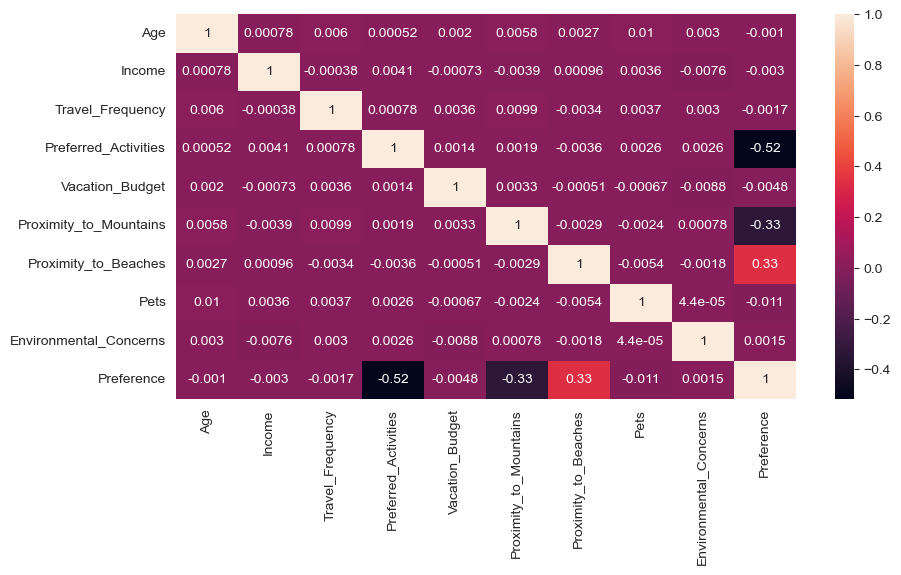

In [48]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.drop(columns=['Education_Level','Gender', 'Location', 'Favorite_Season'])
            .corr(), annot=True)
# sns.pairplot(df.drop(columns=['Education_Level','Gender','Preferred_Activities', 'Location', 'Favorite_Season']))

FROM THE HEATMAP WE CAN SEE PREFERENES ARE CONNECTED WITH A FEW ATTRIBUTES SUCH AS PREFFERED ACTIVITES AND PROXIMITY TO BEACHED OR MOUNTAINS

Check if the dataset is balanced. => THE VALUES ARE NOT BALANCED

<Axes: xlabel='Preference'>

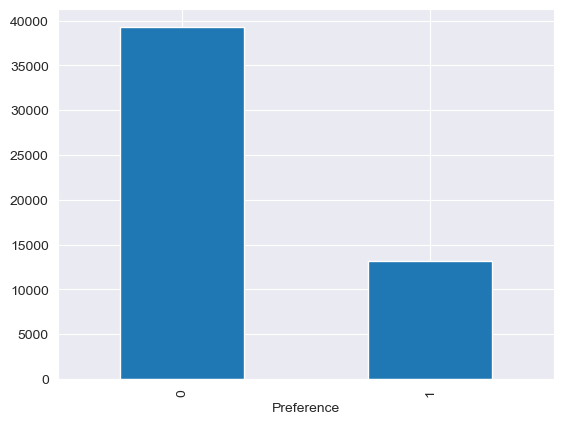

In [6]:
# Write your code here. Add as many boxes as you need.
preference_column = df["Preference"]
preference_column.value_counts().plot(kind='bar')

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [7]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum() / len(df) * 100

Age                       9.999237
Gender                    0.000000
Income                    0.000000
Education_Level           4.999619
Travel_Frequency          0.000000
Preferred_Activities      0.000000
Vacation_Budget           0.000000
Location                  0.000000
Proximity_to_Mountains    4.999619
Proximity_to_Beaches      0.000000
Favorite_Season           0.000000
Pets                      0.000000
Environmental_Concerns    0.000000
Preference                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

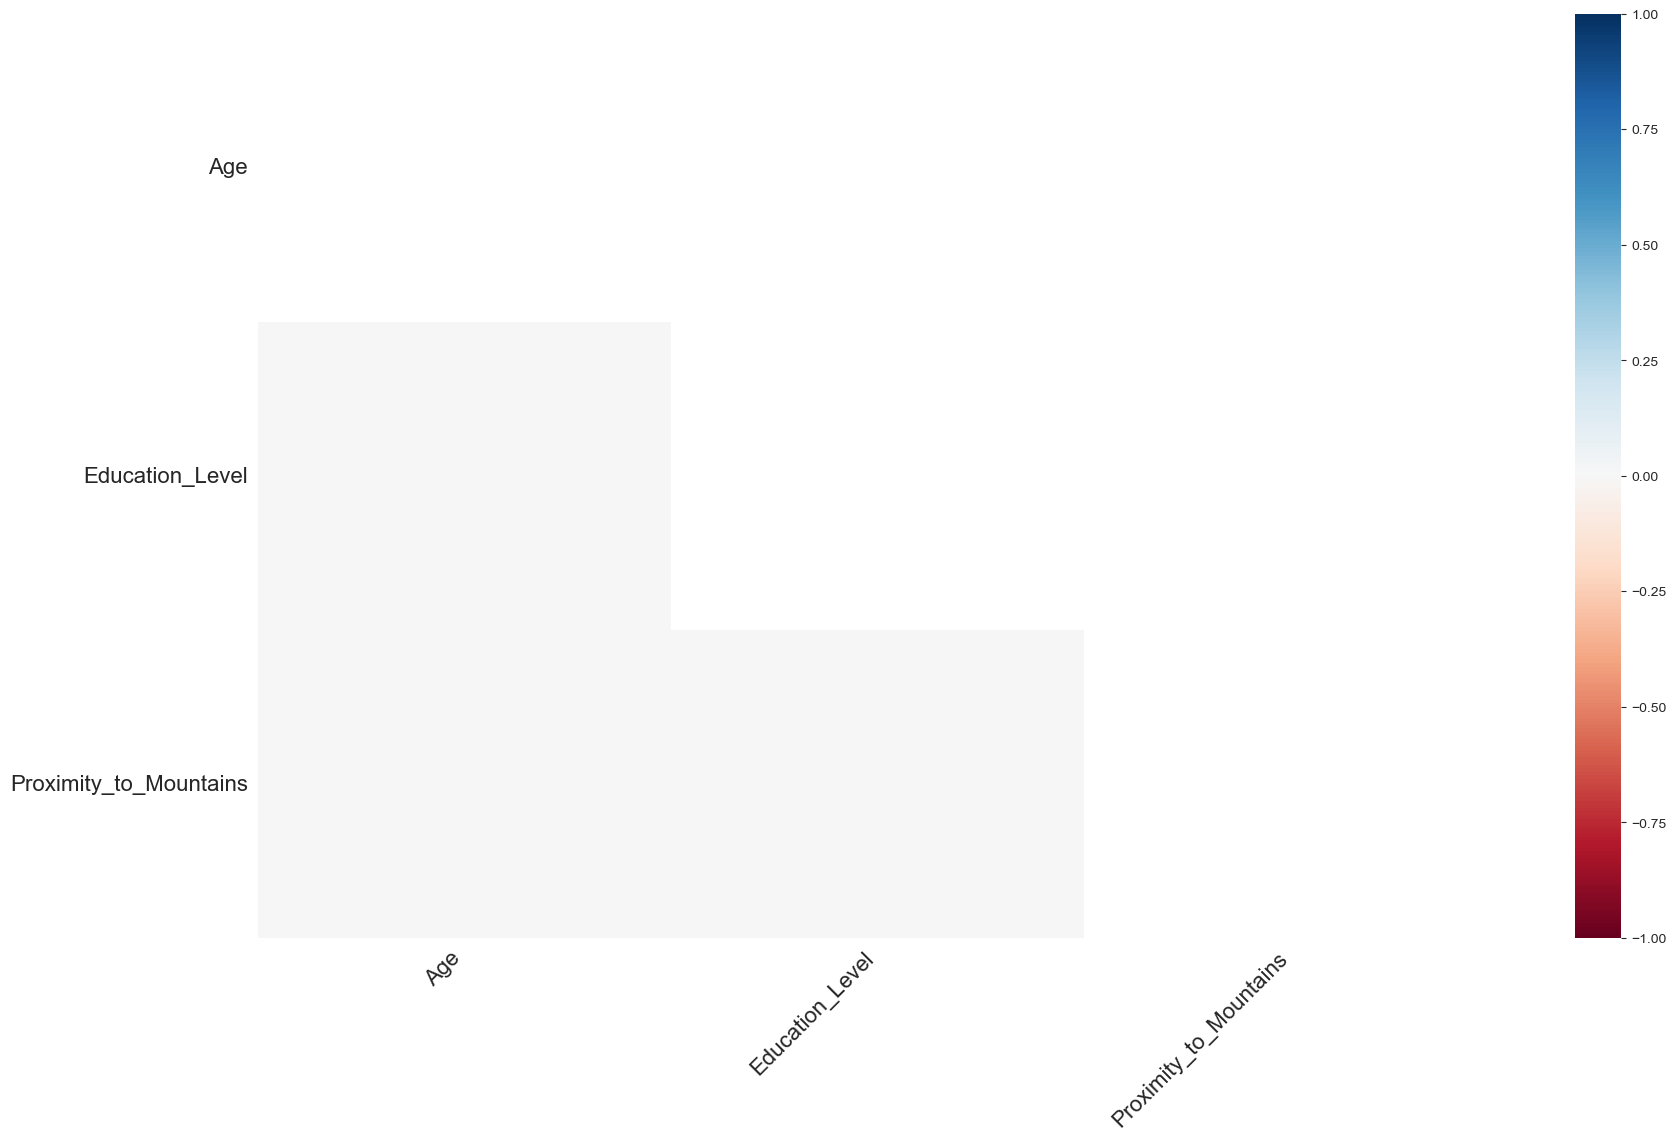

In [71]:
# Write your code here. Add as many boxes as you need.
# msno.dendrogram(df)
msno.heatmap(df)
# msno.matrix(df)
# msno.bar(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [62]:
# Write your code here. Add as many boxes as you need.
def simple_impute_data(data: pd.DataFrame, columns: list, strategy: str):
    imputer = SimpleImputer(strategy=strategy)
    data_copy = data.copy()
    for column in columns:
        data_copy[column] = imputer.fit_transform(data_copy[[column]])
    return data_copy

In [63]:
def drop_data(data: pd.DataFrame, columns: list):
    data_copy = data.copy()
    data_copy.drop(columns, axis=1, inplace=True)
    return data_copy

In [1]:
def knn_impute_data(data: pd.DataFrame, columns: list, n_neighbors: int):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    data_copy = data.copy()
    for column in columns:
        data_copy[column] = imputer.fit_transform(data_copy[column].to_numpy().reshape(-1, 1))
    return data_copy

NameError: name 'pd' is not defined

In [71]:
df = simple_impute_data(df, ['Age'], 'mean')
df = simple_impute_data(df, ['Education_Level'], 'most_frequent')
df = knn_impute_data(df, ['Proximity_to_Mountains'], 5)
df.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [77]:
# Write your code here. Add as many boxes as you need.
X = df.drop("Preference", axis=1)
Y = df["Preference"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [85]:
# Write your code here. Add as many boxes as you need.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [86]:
from xgboost import XGBClassifier

# Write your code here. Add as many boxes as you need.
# knn_model = KNeighborsClassifier()
# forest_model = RandomForestClassifier()
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [87]:
# Write your code here. Add as many boxes as you need.
y_pred = xgb_model.predict(X_test)
# y_pred = forest_model.predict(X_test)
# y_pred = knn_model.predict(X_test)


Assess the performance of the model by using different classification metrics.

In [91]:
# Write your code here. Add as many boxes as you need.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f' Accuracy: {accuracy_score(y_test, y_pred) * 100}%')


[[7779   48]
 [  61 2601]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7827
           1       0.98      0.98      0.98      2662

    accuracy                           0.99     10489
   macro avg       0.99      0.99      0.99     10489
weighted avg       0.99      0.99      0.99     10489

 Accuracy: 98.96081609304986%


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [105]:
# Write your code here. Add as many boxes as you need.
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [106]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
X_tr = X_train1
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [107]:
# Write your code here. Add as many boxes as you need.
param_grid = {
    'n_estimators' : [20,50,100],
    # 'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.05]
    # 'min_samples_split': [2, 5, 10],
    # 'subsample' : [0.9, 1.0],
}
estimator = XGBClassifier(objective="binary:logistic")
cv = GridSearchCV(estimator=estimator, param_grid = param_grid, cv=5, n_jobs=-1, verbose=0)
cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [20, 50, 100]})

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [108]:
# Write your code here. Add as many boxes as you need.
best_model = cv.best_estimator_
best_model.fit(X_train, y_train)

Y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f' Accuracy: {accuracy_score(y_test, y_pred) * 100}%')

[[7779   48]
 [  61 2601]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7827
           1       0.98      0.98      0.98      2662

    accuracy                           0.99     10489
   macro avg       0.99      0.99      0.99     10489
weighted avg       0.99      0.99      0.99     10489

 Accuracy: 98.96081609304986%


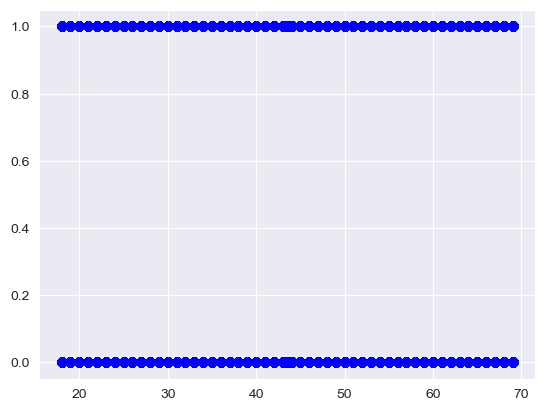

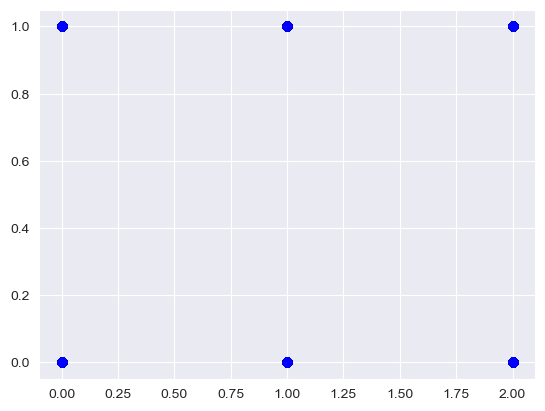

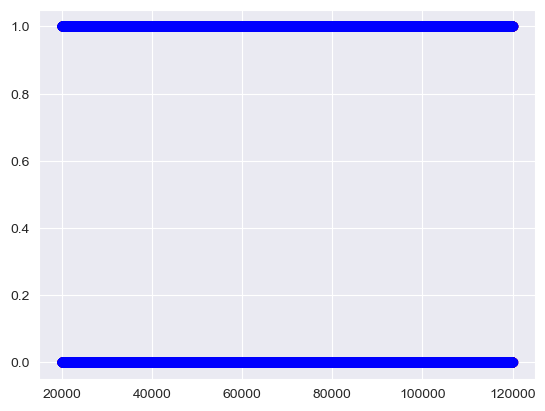

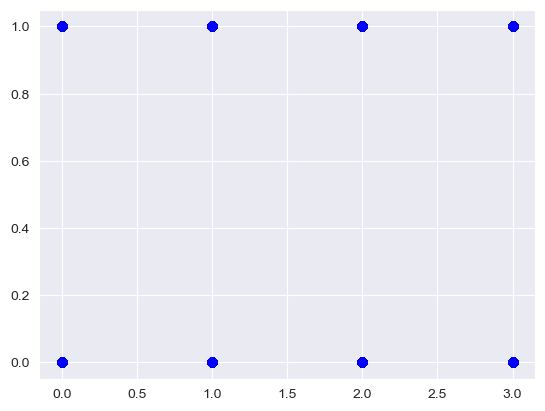

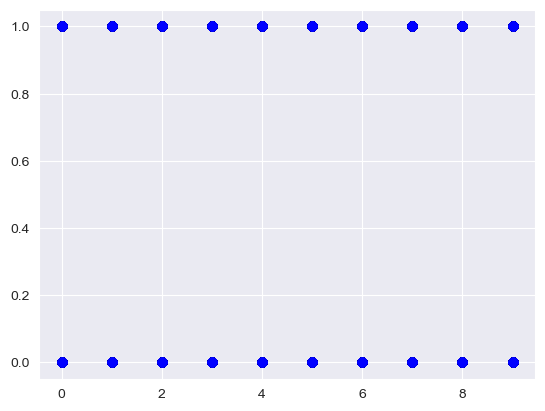

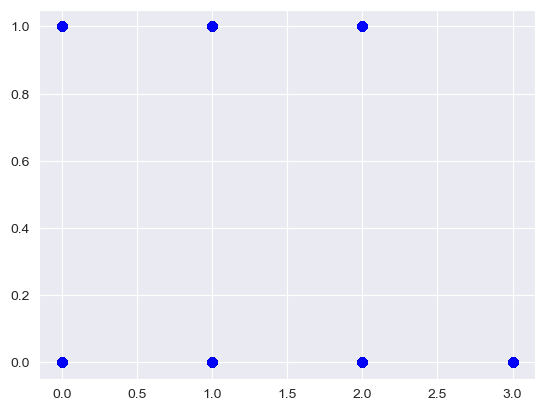

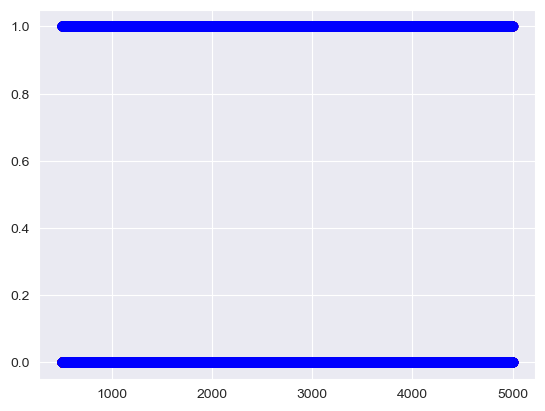

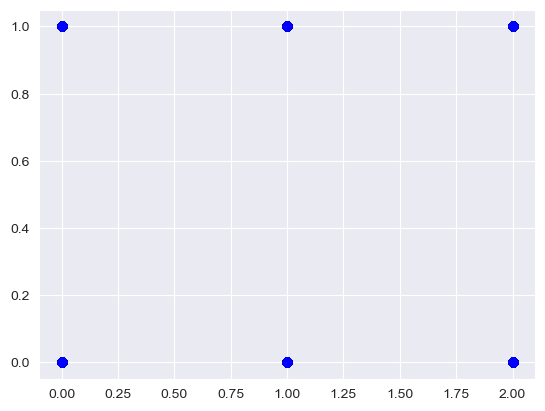

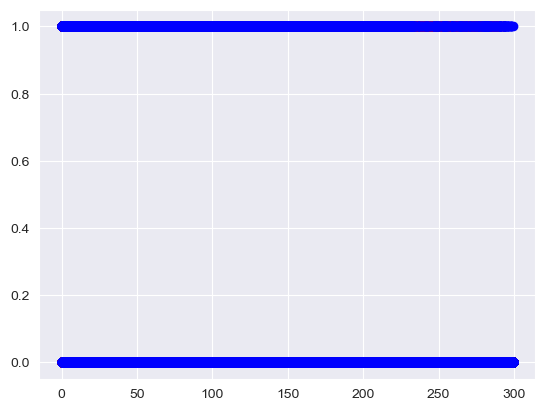

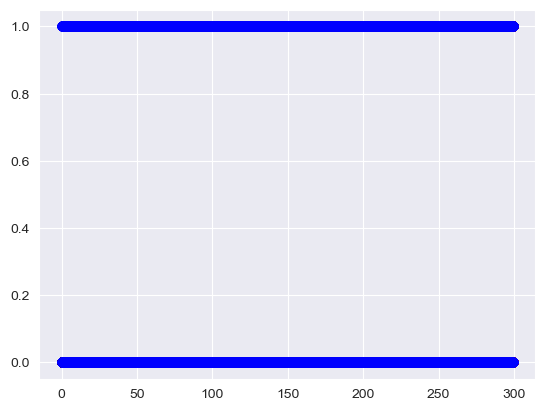

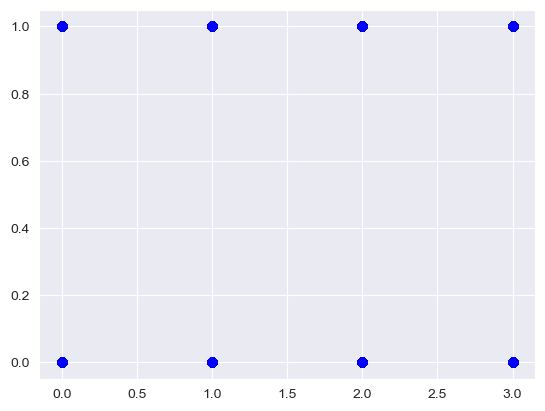

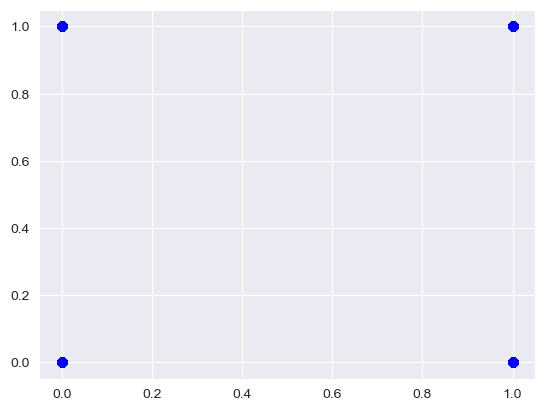

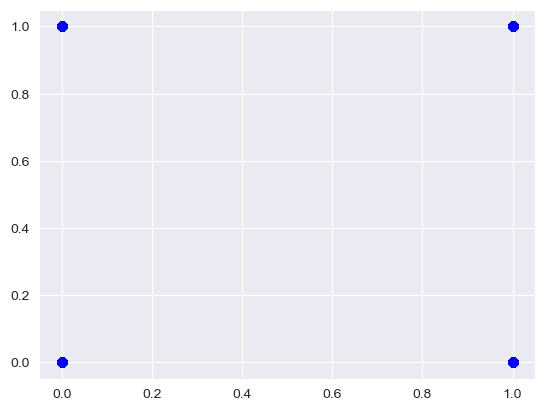

In [111]:
for col in X_tr:
    plt.scatter(X_tr[col].to_list(), Y_train1, color = 'red')
    plt.scatter(X_tr[col].to_list(), best_model.predict(X_train1), color = 'blue')
    plt.show()